In [1]:
import datetime, time

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import GridSearchCV

from IPython.display import clear_output, display, HTML

In [2]:
# Ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

In [4]:
train = pd.read_csv("train_preprocessed.csv")
test = pd.read_csv("test_preprocessed.csv")
all_data = pd.read_csv("all_data_preprocessed.csv")

In [5]:
train_X = train.loc[:, train.columns != 'totals_totalTransactionRevenue']
train_y = train['totals_totalTransactionRevenue']

In [6]:
test_X = test.loc[:, test.columns != 'totals_totalTransactionRevenue']
test_y = test['totals_totalTransactionRevenue']

In [7]:
all_data_X = all_data.loc[:, all_data.columns != 'totals_totalTransactionRevenue']
all_data_y = all_data['totals_totalTransactionRevenue']

## Regression using 2 degree polynomial

In [8]:
poly = PolynomialFeatures(degree=2)

In [9]:
# start = time.time()

# transf_train_X=poly.fit_transform(train_X)

# end = time.time()
# hours, rem = divmod(end-start, 3600)
# minutes, seconds = divmod(rem, 60)
# print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

In [10]:
# start = time.time()

# transf_test_X=poly.fit_transform(test_X)

# end = time.time()
# hours, rem = divmod(end-start, 3600)
# minutes, seconds = divmod(rem, 60)
# print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

In [11]:
# start = time.time()

# transf_all_data_X = poly.fit_transform(all_data_X)

# end = time.time()
# hours, rem = divmod(end-start, 3600)
# minutes, seconds = divmod(rem, 60)
# print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

In [12]:
parameters = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
}

for key, values in parameters.items():
    print(key,"\t- ", values)

fit_intercept 	-  [True, False]
normalize 	-  [True, False]


In [13]:
start = time.time()

gridSearchResult = GridSearchCV(LinearRegression(),
                                parameters, 
                                cv = 5, 
                                scoring='neg_mean_squared_error', 
                                verbose=5
                               ).fit(poly.fit_transform(all_data_X), all_data_y)

clear_output()

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
print("Time Taken: {:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds))

Time Taken: 02:04:54.369


In [14]:
# Show all results
results_df = pd.DataFrame.from_dict(gridSearchResult.cv_results_)
results_df.T

,0,1,2,3
mean_fit_time,675.237,202.249,216.159,185.887
std_fit_time,469.41,30.5,46.0541,38.1712
mean_score_time,34.1078,9.34906,17.1862,9.53451
std_score_time,30.7109,4.25842,9.21239,4.09384
param_fit_intercept,True,True,False,False
param_normalize,True,False,True,False
params,"{'fit_intercept': True, 'normalize': True}","{'fit_intercept': True, 'normalize': False}","{'fit_intercept': False, 'normalize': True}","{'fit_intercept': False, 'normalize': False}"
split0_test_score,-2.79759e+14,-2.81859e+14,-2.81927e+14,-2.81927e+14
split1_test_score,-8.96291e+14,-8.89032e+14,-8.50578e+14,-8.50578e+14
split2_test_score,-5.03892e+14,-4.94106e+14,-4.94915e+14,-4.94915e+14


In [15]:
# Results with rank 1
rank_one = results_df[results_df['rank_test_score'] == 1][['params', 'mean_fit_time', 'std_fit_time', 'mean_train_score', 'std_train_score', 'mean_test_score', 'std_test_score']]
rank_one = pd.concat([rank_one['params'].apply(pd.Series), rank_one], axis = 1, sort=True).drop(columns = 'params')
rank_one.T

,1
fit_intercept,True
normalize,False
mean_fit_time,202.249
std_fit_time,30.5
mean_train_score,-5.99278e+14
std_train_score,1.50912e+14
mean_test_score,-8.41857e+14
std_test_score,6.85371e+14


In [16]:
gridSearchResult.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
start = time.time()

model = gridSearchResult.best_estimator_.fit(poly.fit_transform(train_X), train_y)

end = time.time()
hours, rem = divmod(end-start, 3600)
minutes, seconds = divmod(rem, 60)
time_taken = "{:0>2}:{:0>2}:{:05.3f}".format(int(hours),int(minutes),seconds)

In [18]:
predictions = pd.Series(model.predict(poly.fit_transform(test_X)))

In [19]:
print("Mean Squared Error:", (mean_squared_error(test_y, predictions))**0.5)
print("Time Taken to Fit:", time_taken)

Mean Squared Error: 17103568.814401194
Time Taken to Fit: 00:01:16.082


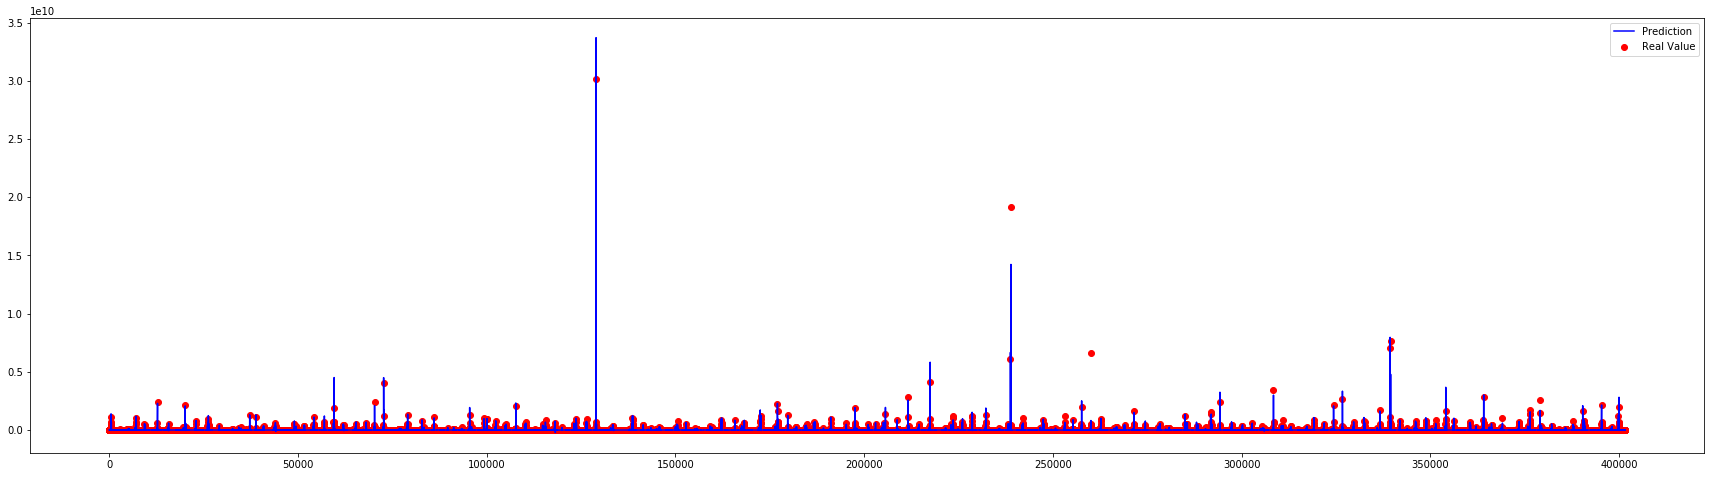

In [20]:
fig = plt.figure(figsize=(30,8))
ax = plt.axes()

ax.plot(predictions.index, predictions, color = 'blue', label='Prediction')
ax.scatter(test_y.index, test_y, color = 'red', label='Real Value')

ax.legend(loc='best')
plt.show()